In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import gdown

# File ID from your link
file_id = '1KCKfyIGbQi8a7bIYta3LM8dFStxVzVX-'

# Destination path
output = '/content/data.zip'

# Downloading the file
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1KCKfyIGbQi8a7bIYta3LM8dFStxVzVX-
From (redirected): https://drive.google.com/uc?id=1KCKfyIGbQi8a7bIYta3LM8dFStxVzVX-&confirm=t&uuid=6168fde3-dbd2-4a21-ab74-f495e08534be
To: /content/data.zip
100%|██████████| 1.78G/1.78G [00:26<00:00, 66.1MB/s]


'/content/data.zip'

In [4]:
import zipfile
import os

zip_file_path = 'Shop DataSet.zip'  # Replace with the actual filename
output_dir = '/content/extracted_files/'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

# Verify the contents
print("Files after unzipping:")
print(os.listdir(output_dir))


Files after unzipping:
['Shop DataSet']


In [5]:
import os

# Define paths to the subfolders
dataset_folder = '/content/extracted_files/Shop DataSet'  # Specify the path to your dataset
non_shoplifters_folder = os.path.join(dataset_folder, 'non shop lifters')
shoplifters_folder = os.path.join(dataset_folder, 'shop lifters')

# List files in each subfolder
non_shoplifters_files = os.listdir(non_shoplifters_folder)
shoplifters_files = os.listdir(shoplifters_folder)

# Create a labeled list of files
labeled_data = [('non_shoplifter', os.path.join(non_shoplifters_folder, f)) for f in non_shoplifters_files] + \
               [('shoplifter', os.path.join(shoplifters_folder, f)) for f in shoplifters_files]

print("Labeled data:")
for label, filepath in labeled_data:
    print(f"{label}: {filepath}")


Labeled data:
non_shoplifter: /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_181.mp4
non_shoplifter: /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_154_1.mp4
non_shoplifter: /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_169.mp4
non_shoplifter: /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_42_1.mp4
non_shoplifter: /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_2.mp4
non_shoplifter: /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_104_1.mp4
non_shoplifter: /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_141_1.mp4
non_shoplifter: /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_182_1.mp4
non_shoplifter: /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_67.mp4
non_shoplifter: /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_116.mp4
non_shoplifter: /content/extracted_files/Shop Data

In [6]:
import hashlib

def file_hash(filepath):
    hasher = hashlib.md5()
    with open(filepath, 'rb') as f:
        hasher.update(f.read())
    return hasher.hexdigest()

unique_files = {}
duplicates = []

for label, filepath in labeled_data:
    file_hash_value = file_hash(filepath)
    if file_hash_value not in unique_files:
        unique_files[file_hash_value] = (label, filepath)
    else:
        duplicates.append(filepath)

# Print duplicates
if duplicates:
    print("\nDuplicate files found:")
    for dup in duplicates:
        print(dup)
else:
    print("\nNo duplicates found.")



Duplicate files found:
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_181_1.mp4
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_136.mp4
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_86_1.mp4
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_37_1.mp4
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_166_1.mp4
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_141.mp4
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_1_1.mp4
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_184_1.mp4
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_116_1.mp4
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_39_1.mp4
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_57.mp4
/content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_82_1.mp4
/content/extracted_files/Shop DataSet/non

In [7]:
import os

# Path to your dataset directory
dataset_path = '/content/extracted_files/Shop DataSet/non shop lifters/'

# Get a list of all files in the directory
files = os.listdir(dataset_path)

# Create a set to track unique files
seen_files = set()

# Loop through the files and remove duplicates
for filename in files:
    if filename in seen_files:
        # Construct full file path
        file_path = os.path.join(dataset_path, filename)
        # Remove the duplicate file
        os.remove(file_path)
        print(f'Removed duplicate file: {file_path}')
    else:
        seen_files.add(filename)

print('Duplicate removal complete.')


Duplicate removal complete.


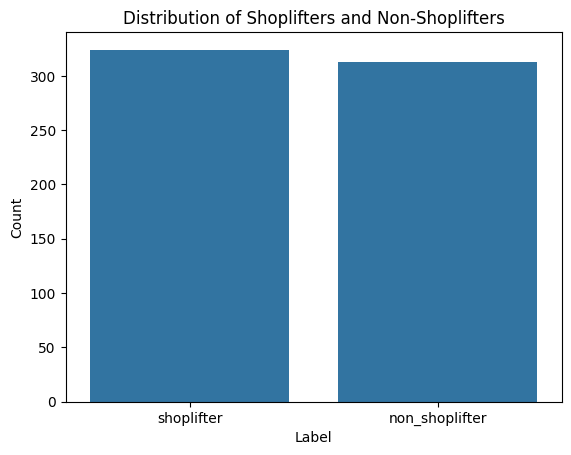

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each label
label_counts = {'shoplifter': sum(1 for label in unique_files.values() if label[0] == 'shoplifter'),
                'non_shoplifter': sum(1 for label in unique_files.values() if label[0] == 'non_shoplifter')}

# Create a bar plot
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title('Distribution of Shoplifters and Non-Shoplifters')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


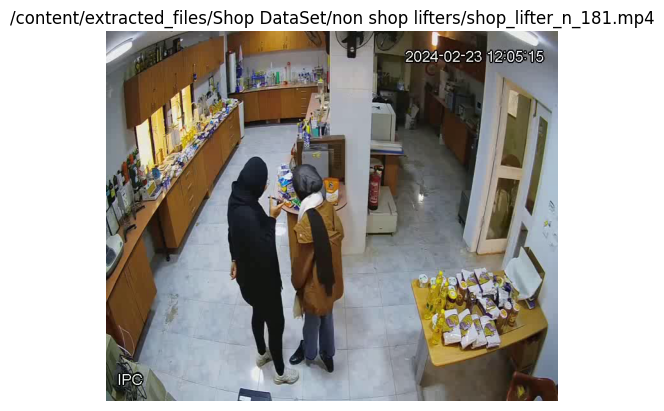

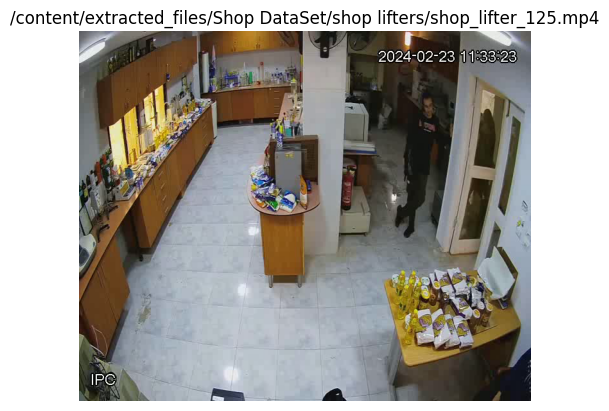

In [9]:
import cv2

def display_video_sample(filepath):
    cap = cv2.VideoCapture(filepath)
    ret, frame = cap.read()

    if ret:
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(filepath)
        plt.show()
    cap.release()

# Display a sample from each category
if labeled_data:
    display_video_sample(unique_files[list(unique_files.keys())[0]][1])  # Sample from first unique file
    display_video_sample(unique_files[list(unique_files.keys())[-1]][1])  # Sample from last unique file


In [10]:
import os
import cv2

def extract_frames(video_path, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    video = cv2.VideoCapture(video_path)

    count = 0

    while video.isOpened():
        success, frame = video.read()
        if not success:
            break

        # Save every frame
        frame_resized = cv2.resize(frame, (224, 224))  # Resize to 224x224
        frame_filename = os.path.join(output_dir, f"frame_{count}.jpg")
        cv2.imwrite(frame_filename, frame_resized)

        count += 1

    video.release()
    print(f"Extracted {count} frames from {video_path}")

In [11]:
# Define paths
non_shoplifters_folder = '/content/extracted_files/Shop DataSet/non shop lifters/'
shoplifters_folder = '/content/extracted_files/Shop DataSet/shop lifters/'
output_non_shoplifters = '/content/extracted_files/Shop DataSet/frames/non_shoplifters/'
output_shoplifters = '/content/extracted_files/Shop DataSet/frames/shoplifters/'

# Extract frames from all videos in each category
for video_file in os.listdir(non_shoplifters_folder):
    if video_file.endswith('.mp4'):
        extract_frames(os.path.join(non_shoplifters_folder, video_file), output_non_shoplifters)

for video_file in os.listdir(shoplifters_folder):
    if video_file.endswith('.mp4'):
        extract_frames(os.path.join(shoplifters_folder, video_file), output_shoplifters)

Extracted 275 frames from /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_181.mp4
Extracted 225 frames from /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_154_1.mp4
Extracted 475 frames from /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_169.mp4
Extracted 500 frames from /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_42_1.mp4
Extracted 325 frames from /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_2.mp4
Extracted 350 frames from /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_104_1.mp4
Extracted 375 frames from /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_141_1.mp4
Extracted 375 frames from /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_182_1.mp4
Extracted 425 frames from /content/extracted_files/Shop DataSet/non shop lifters/shop_lifter_n_67.mp4
Extracted 250 frames from /content/extracted_files/Shop DataSet/non

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
         layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_model()



In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation and Normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    '/content/extracted_files/Shop DataSet/frames/',  # Directory with the extracted frames
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/extracted_files/Shop DataSet/frames/',  # Directory with the extracted frames
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1936 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [17]:

# Training the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


Epoch 1/10
61/61 [==============================] - 34s 539ms/step - loss: 0.8164 - accuracy: 0.7469 - val_loss: 0.6324 - val_accuracy: 0.7645
Epoch 2/10
61/61 [==============================] - 33s 530ms/step - loss: 0.5534 - accuracy: 0.7645 - val_loss: 0.5632 - val_accuracy: 0.7645
Epoch 3/10
61/61 [==============================] - 32s 524ms/step - loss: 0.5561 - accuracy: 0.7645 - val_loss: 0.5794 - val_accuracy: 0.7645
Epoch 4/10
61/61 [==============================] - 33s 535ms/step - loss: 0.5507 - accuracy: 0.7645 - val_loss: 0.5712 - val_accuracy: 0.7645
Epoch 5/10
61/61 [==============================] - 32s 526ms/step - loss: 0.5495 - accuracy: 0.7645 - val_loss: 0.5820 - val_accuracy: 0.7645
Epoch 6/10
61/61 [==============================] - 32s 524ms/step - loss: 0.5493 - accuracy: 0.7645 - val_loss: 0.5699 - val_accuracy: 0.7645
Epoch 7/10
 5/61 [=>............................] - ETA: 26s - loss: 0.5582 - accuracy: 0.7500

KeyboardInterrupt: 

In [ ]:
Using CNN

**USING CNN**

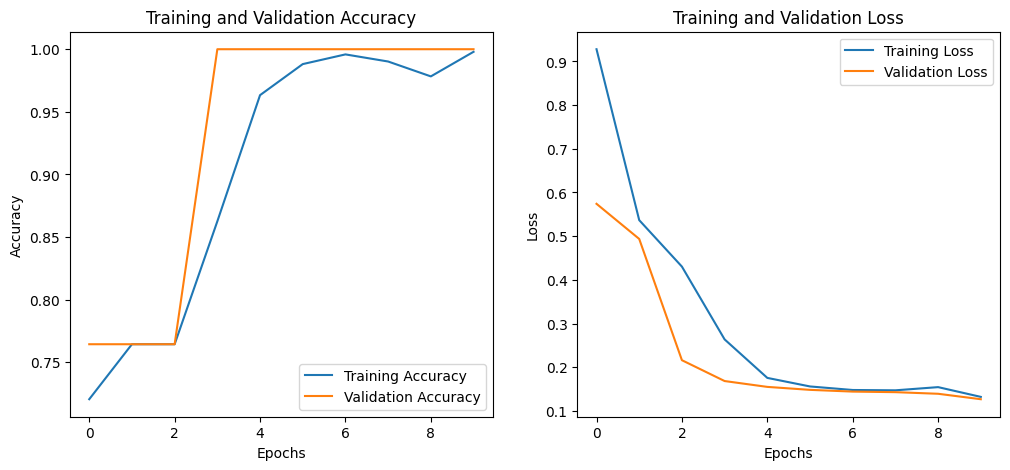

In [ ]:
import matplotlib.pyplot as plt
# Plotting the accuracy
plt.figure(figsize=(12, 5))

# Plotting training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Use Pretrained Model

In [18]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the MobileNetV2 model, excluding the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of it
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification: shoplifter or non-shoplifter
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 128)               163968    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2422081 (9.24 MB)
Trainable params: 164097 (641.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [19]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Set the number of epochs as required
    validation_data=validation_generator
)

# Save the model
model.save('shoplifter_classifier.h5')


Epoch 1/10
61/61 [==============================] - 34s 523ms/step - loss: 0.4444 - accuracy: 0.8089 - val_loss: 0.2126 - val_accuracy: 0.9339
Epoch 2/10
61/61 [==============================] - 30s 491ms/step - loss: 0.2516 - accuracy: 0.9086 - val_loss: 0.1320 - val_accuracy: 0.9669
Epoch 3/10
61/61 [==============================] - 30s 492ms/step - loss: 0.2124 - accuracy: 0.9132 - val_loss: 0.1139 - val_accuracy: 0.9711
Epoch 4/10
61/61 [==============================] - 30s 498ms/step - loss: 0.1727 - accuracy: 0.9334 - val_loss: 0.1031 - val_accuracy: 0.9711
Epoch 5/10
61/61 [==============================] - 31s 500ms/step - loss: 0.1616 - accuracy: 0.9354 - val_loss: 0.0786 - val_accuracy: 0.9814
Epoch 6/10
61/61 [==============================] - 31s 501ms/step - loss: 0.1785 - accuracy: 0.9272 - val_loss: 0.0991 - val_accuracy: 0.9711
Epoch 7/10
61/61 [==============================] - 30s 497ms/step - loss: 0.1539 - accuracy: 0.9447 - val_loss: 0.0567 - val_accuracy: 0.9814

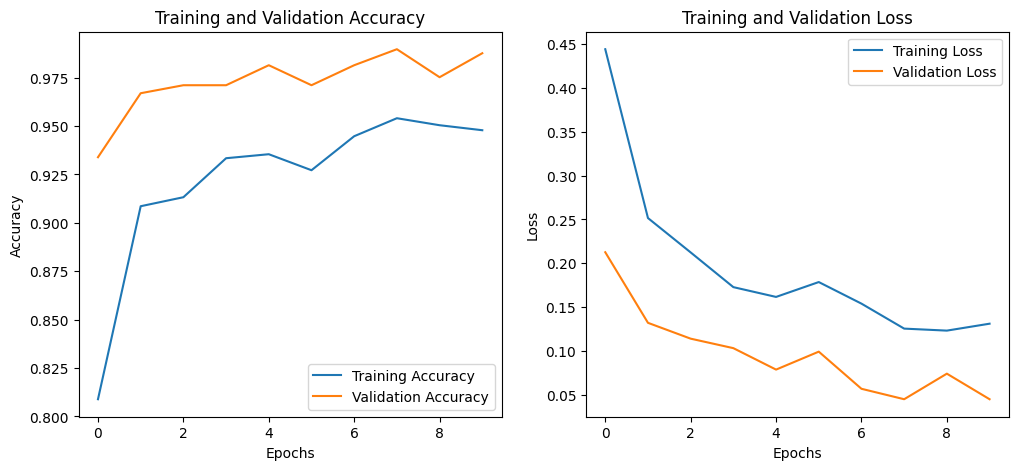

In [20]:
import matplotlib.pyplot as plt
# Plotting the accuracy
plt.figure(figsize=(12, 5))

# Plotting training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Fine Tuning the pretrained model

In [24]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import  Dropout
model3 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),  # Normalize activations for better training
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model3.h5', save_best_only=True)

history = model3.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/20
61/61 [==============================] - ETA: 0s - loss: 0.5250 - accuracy: 0.7397

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


61/61 [==============================] - 35s 523ms/step - loss: 0.5250 - accuracy: 0.7397 - val_loss: 0.7116 - val_accuracy: 0.5475
Epoch 2/20
61/61 [==============================] - 31s 504ms/step - loss: 0.3152 - accuracy: 0.8642 - val_loss: 0.1378 - val_accuracy: 0.9690
Epoch 3/20
61/61 [==============================] - 31s 508ms/step - loss: 0.2185 - accuracy: 0.9117 - val_loss: 0.1028 - val_accuracy: 0.9835
Epoch 4/20
61/61 [==============================] - 31s 501ms/step - loss: 0.1965 - accuracy: 0.9184 - val_loss: 0.0921 - val_accuracy: 0.9649
Epoch 5/20
61/61 [==============================] - 30s 497ms/step - loss: 0.1669 - accuracy: 0.9349 - val_loss: 0.1002 - val_accuracy: 0.9587
Epoch 6/20
61/61 [==============================] - 30s 497ms/step - loss: 0.1435 - accuracy: 0.9442 - val_loss: 0.0467 - val_accuracy: 0.9959
Epoch 7/20
61/61 [==============================] - 30s 497ms/step - loss: 0.1454 - accuracy: 0.9427 - val_loss: 0.0494 - val_accuracy: 0.9814
Epoch 8/20

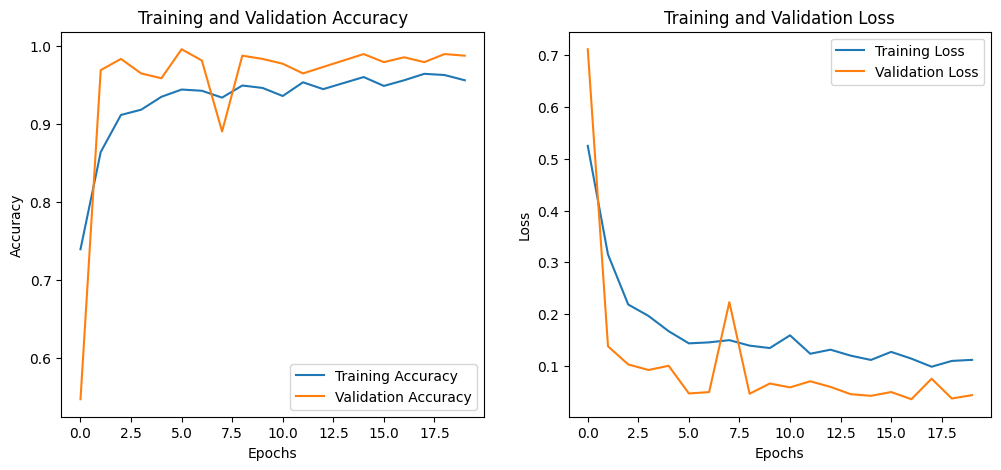

In [26]:
import matplotlib.pyplot as plt
# Plotting the accuracy
plt.figure(figsize=(12, 5))

# Plotting training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()